In [1]:
# import libraries
import numpy as np
import pandas as pd
import h5py
import json
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from itertools import compress
import os
from datetime import datetime
from calfews_src import *
from calfews_src.util import *
# from calfews_src.visualizer import Visualizer

### FKC capacity constraints

In [43]:
datDaily = get_results_sensitivity_number_outside_model('results/wy2017/results.hdf5', '')
keys = list(datDaily.keys())


In [44]:
[s for s in keys if s.split('_')[0]=='lowertule']

['lowertule_friant1_projected',
 'lowertule_friant1_delivery',
 'lowertule_friant1_carryover',
 'lowertule_friant1_dynamic_recharge_cap',
 'lowertule_friant2_projected',
 'lowertule_friant2_delivery',
 'lowertule_friant2_carryover',
 'lowertule_friant2_dynamic_recharge_cap',
 'lowertule_cvc_projected',
 'lowertule_cvc_carryover',
 'lowertule_cvc_dynamic_recharge_cap',
 'lowertule_tule_projected',
 'lowertule_tule_delivery',
 'lowertule_tule_dynamic_recharge_cap',
 'lowertule_friant1_flood',
 'lowertule_friant1_flood_irrigation',
 'lowertule_kaweah_flood',
 'lowertule_kaweah_flood_irrigation',
 'lowertule_tule_flood',
 'lowertule_tule_flood_irrigation',
 'lowertule_kings_flood',
 'lowertule_LWT_recharged',
 'lowertule_pumping',
 'lowertule_irr_demand',
 'lowertule_tot_demand']

In [3]:
flow = [s for s in keys if s.split('_')[0]=='fkc' and s.split('_')[2]=='flow']
nodes = [k.split('_')[1] for k in flow]
turnout = [s for s in keys if s.split('_')[0]=='fkc' and s.split('_')[2]=='turnout']

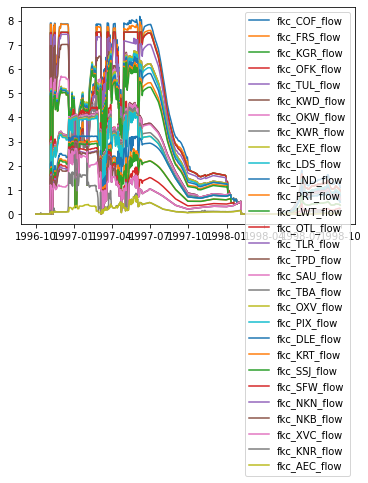

In [5]:
plt.figure()
for k in flow:
    plt.plot(datDaily[k], label=k)
plt.legend()

In [8]:
flowfrac = np.zeros((datDaily.shape[0], len(flow)))
flowtot = np.zeros((datDaily.shape[0], len(flow)))
for i,k in enumerate(flow):
    flowfrac[:, -(1+i)] = datDaily[k] / datDaily[k].max()
    flowtot[:, -(i+1)] = datDaily[k]
flowfrac = flowfrac.transpose()
flowtot = flowtot.transpose()

tofrac = np.zeros((datDaily.shape[0], len(turnout)))    
tonode = np.zeros((datDaily.shape[0], len(turnout)))    
for i,k in enumerate(turnout):
    tofrac[:, -(i+1)] = datDaily[k] / datDaily[k].max()
    tonode[:, -(i+1)] = datDaily[k]
tofrac = tofrac.transpose()
tonode = tonode.transpose()

totot = np.zeros((datDaily.shape[0]))    
for i,k in enumerate(turnout):
    totot[:] += datDaily[k]

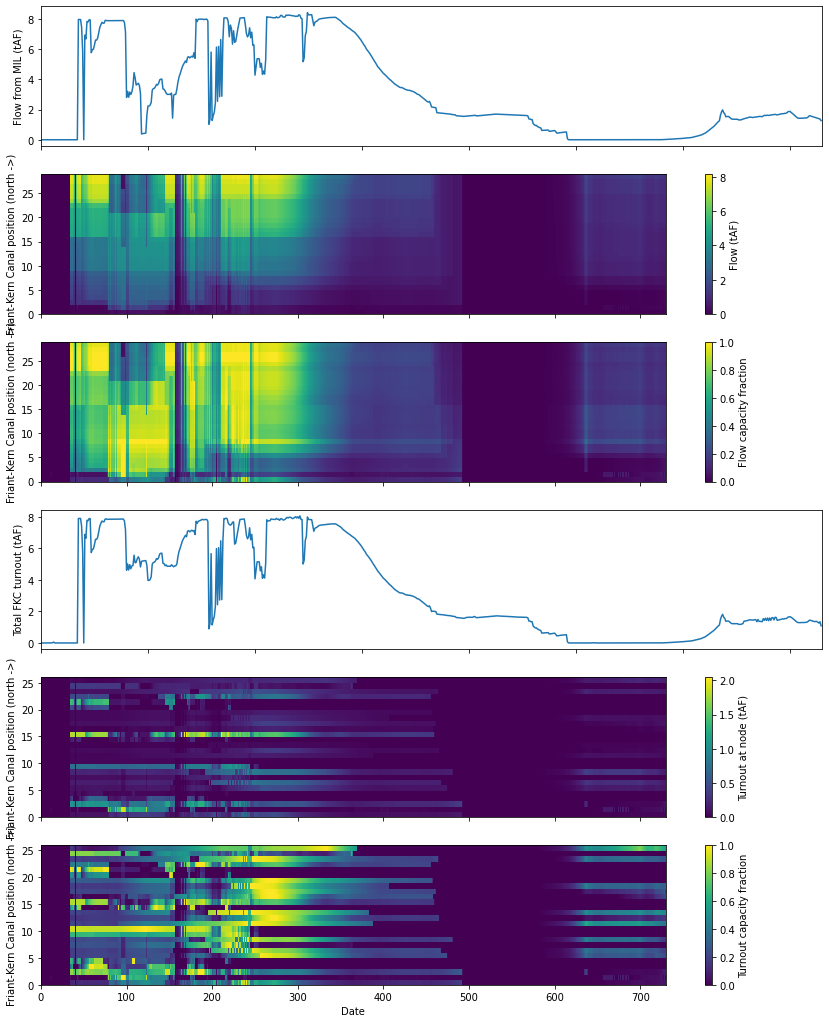

In [9]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, figsize=(14,18), sharex=True)
ax1.plot((datDaily['fkc_COF_flow'] + datDaily['fkc_COF_turnout']).values)
ax1.set_ylabel('Flow from MIL (tAF)')

m = ax2.pcolormesh(flowtot)
a = ax2.set_ylabel('Friant-Kern Canal position (north ->)')
cb = plt.colorbar(mappable=m, ax=ax2)
cb.set_label('Flow (tAF)')

m = ax3.pcolormesh(flowfrac)
a = ax3.set_ylabel('Friant-Kern Canal position (north ->)')
cb = plt.colorbar(mappable=m, ax=ax3)
cb.set_label('Flow capacity fraction')


ax4.plot(totot)
ax4.set_ylabel('Total FKC turnout (tAF)')

m = ax5.pcolormesh(tonode)
a = ax5.set_ylabel('Friant-Kern Canal position (north ->)')
cb = plt.colorbar(mappable=m, ax=ax5)
cb.set_label('Turnout at node (tAF)')

m = ax6.pcolormesh(tofrac)
a = ax6.set_xlabel('Date')
a = ax6.set_ylabel('Friant-Kern Canal position (north ->)')
cb = plt.colorbar(mappable=m, ax=ax6)
cb.set_label('Turnout capacity fraction')

In [10]:
fkc_capacity = np.array([5217.0, 5217.0, 5217.0, 5217.0, 3797.0, 3887.0, 3887.0, 4196.0, 4196.0, 3427.0, 3427.0, 3427.0, 4060.0, 4060.0, 4060.0, 4060.0, 2921.0, 2921.0, 2921.0, 2921.0, 2921.0, 1625.0, 1625.0, 1625.0, 1893.0, 1893.0, 1893.0, 1897.0, 1897.0, 1000.0, 0.0])*  2.29568411*10**-5 * 86400 / 1000
# fkc_capacity = np.array([5300.0, 5300.0, 5300.0, 5217.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 3500.0, 3500.0, 3500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 1000.0, 0.0])*  2.29568411*10**-5 * 86400 / 1000
fkc_node = ["MIL","FRS","COF","KGR","OFK","TUL","KWD","OKW","KWR","EXE","LDS","LND","PRT","LWT","OTL","TLR","TPD","SAU","TBA","OXV","PIX","DLE","KRT","SSJ","SFW","NKN","NKB","XVC","KNR","AEC","none"]
fkc_turnout = [0.0, 5300.0, 5300.0, 5217.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 3500.0, 3500.0, 3500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 1000.0]
# print(len(fkc_capacity), len(fkc_node), len(fkc_turnout))
fkc_capacity = fkc_capacity[1:-1]


In [ ]:
plt.figure(figsize=(14,10))
for i,k in enumerate(nodes):
    flow = datDaily['fkc_'+k+'_flow']
    plt.scatter(np.ones(flowtot.shape[1])*i, flow.values, alpha=0.1, c='b')
plt.plot(fkc_capacity, lw=3, c='k')

In [11]:
flowfrac = np.zeros((datDaily.shape[0], len(flow)))
flowtot = np.zeros((datDaily.shape[0], len(flow)))
for i,k in enumerate(flow):
    flowfrac[:, i] = datDaily[k] / datDaily[k].max()
    flowtot[:, i] = datDaily[k]
flowfrac = flowfrac.transpose()
flowtot = flowtot.transpose()

tofrac = np.zeros((datDaily.shape[0], len(turnout)))    
tonode = np.zeros((datDaily.shape[0], len(turnout)))    
for i,k in enumerate(turnout):
    tofrac[:, i] = datDaily[k] / datDaily[k].max()
    tonode[:, i] = datDaily[k]
tofrac = tofrac.transpose()
tonode = tonode.transpose()

totot = np.zeros((datDaily.shape[0]))    
for i,k in enumerate(turnout):
    totot[:] += datDaily[k]

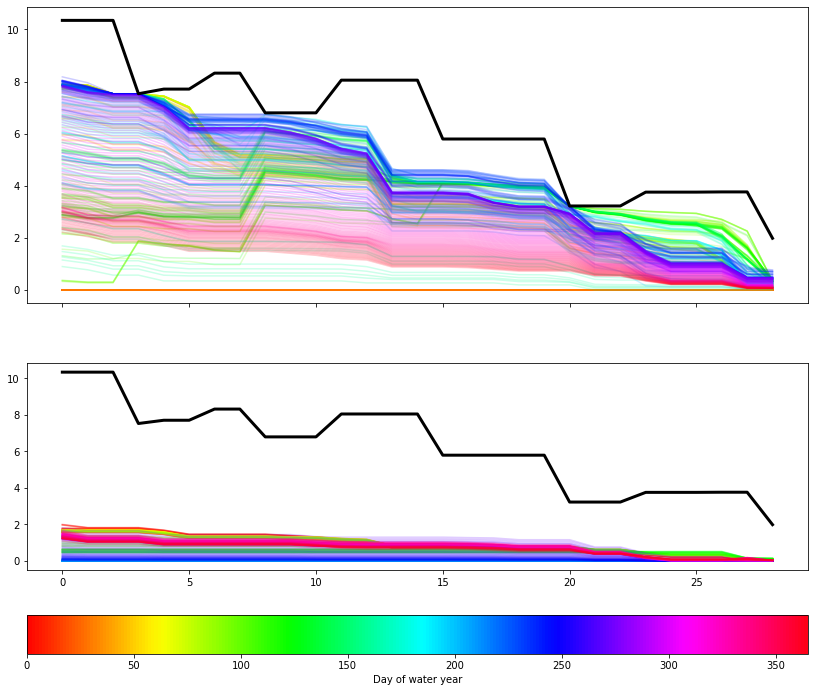

In [53]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(14,12), sharex=True)
cmap = cm.get_cmap('hsv')
norm = colors.Normalize(vmin=0, vmax=365)

for t in range(365):
    col = (t%365)/365
    ax1.plot(flowtot[:,t], alpha=0.2, c=cmap(col))
ax1.plot(fkc_capacity, lw=3, c='k')

for t in range(365, flowtot.shape[1]):
    col = (t%365)/365
    ax2.plot(flowtot[:,t], alpha=0.2, c=cmap(col))
ax2.plot(fkc_capacity, lw=3, c='k')

cb1 = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), orientation='horizontal')
cb1.set_label('Day of water year')

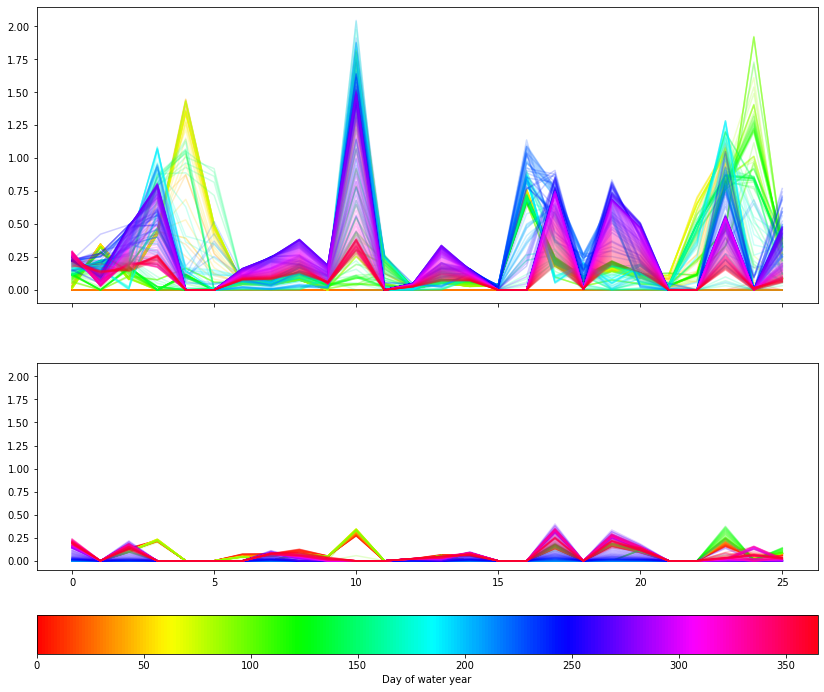

In [52]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(14,12), sharex=True, sharey=True)
cmap = cm.get_cmap('hsv')
norm = colors.Normalize(vmin=0, vmax=365)

for t in range(365):
    col = (t%365)/365
    ax1.plot(tonode[:,t], alpha=0.2, c=cmap(col))
# ax1.plot(fkc_capacity, lw=3, c='k')

for t in range(365, flowtot.shape[1]):
    col = (t%365)/365
    ax2.plot(tonode[:,t], alpha=0.2, c=cmap(col))
# ax2.plot(fkc_capacity, lw=3, c='k')

cb1 = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), orientation='horizontal')
cb1.set_label('Day of water year')

In [ ]:
cmap_vir(0.9)

## compare fkc ownership scenarios

In [3]:
dat = {}
dat['NoRehab'] = get_results_sensitivity_number_outside_model('results/test_wy2017/results.hdf5', '')
dat['NoOwn'] = get_results_sensitivity_number_outside_model('results/test_rehabFull/results.hdf5', '')
dat['WithOwn'] = get_results_sensitivity_number_outside_model('results/test_rehabOwnership/results.hdf5', '')
keys = {}
keys['NoRehab'] = list(dat['NoRehab'].keys())
keys['NoOwn'] = list(dat['NoOwn'].keys())
keys['WithOwn'] = list(dat['WithOwn'].keys())


In [4]:
[len(l) for l in keys.values()]

[1119, 1119, 1119]

In [48]:
flow = {}
nodes = {}
turnout = {}
for k in ['NoRehab', 'NoOwn', 'WithOwn']:
    flow[k] = [s for s in keys[k] if s.split('_')[0]=='fkc' and s.split('_')[2]=='flow']
    nodes[k] = [k.split('_')[1] for k in flow[k]]
    turnout[k] = [s for s in keys[k] if s.split('_')[0]=='fkc' and s.split('_')[2]=='turnout']
# flow

NoRehab
NoOwn
WithOwn


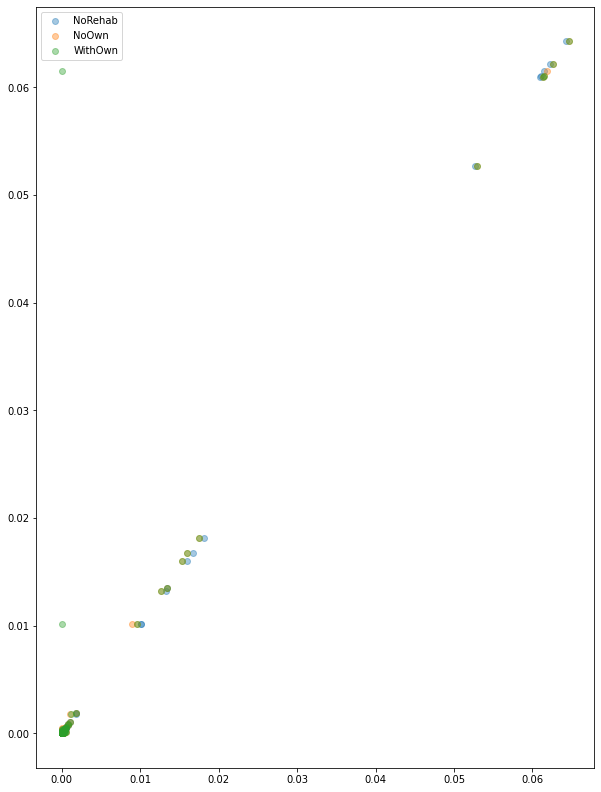

In [33]:
# plt.figure()
# for k in flow:
#     plt.plot(datDaily[k], label=k)
# plt.legend()

plt.figure(figsize=(10,14))
for k in ['NoRehab', 'NoOwn', 'WithOwn']:
    print(k)
    plt.scatter(dat[k]['fkc_LWT_turnout'], dat['NoRehab']['fkc_LWT_turnout'], alpha=0.4, label=k)
plt.legend()

In [37]:
print(dat['NoRehab']['fkc_LWT_turnout'].sum(), dat['NoOwn']['fkc_LWT_turnout'].sum(), dat['WithOwn']['fkc_LWT_turnout'].sum())

0.4864245158213423 0.4829698281477781 0.41374036599353436


In [5]:
[s for s in keys['NoRehab'] if s.split('_')[-1]=='delivery']# and s.split('_')[2]=='flow']


['berrenda_tableA_delivery',
 'belridge_tableA_delivery',
 'buenavista_tableA_delivery',
 'buenavista_kern_delivery',
 'cawelo_tableA_delivery',
 'henrymiller_tableA_delivery',
 'ID4_tableA_delivery',
 'kerndelta_tableA_delivery',
 'losthills_tableA_delivery',
 'rosedale_tableA_delivery',
 'semitropic_tableA_delivery',
 'tejon_tableA_delivery',
 'wheeler_tableA_delivery',
 'kcwa_tableA_delivery',
 'socal_tableA_delivery',
 'southbay_tableA_delivery',
 'southbay_cvpdelta_delivery',
 'southbay_exchange_delivery',
 'dudleyridge_tableA_delivery',
 'wonderful_BLR_tableA_delivery',
 'wonderful_LHL_tableA_delivery',
 'wonderful_BDM_tableA_delivery']